In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Exploration Library
import scipy.stats as stats
from minepy import MINE

#### Aggregation of Highest Correlated Features

In [2]:
highest_correlated_features = []

### 2017

In [5]:
madden_18 = pd.read_csv('data/madden_18.csv')

In [6]:
madden_18.columns

Index(['Team', 'Last Name', 'First Name', 'Position', 'Jersey Number',
       'Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Run Block Strength',
       'Run Block Footwork', 'Run Block.1', 'Pass Block Strength',
       'Pass Block.1', 'Pass Block Footwork', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Throw on the Run', 'Height', 'Weight', 'Age',
       'Birthdat

In [7]:
madden_18_df = madden_18[['Team','Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Run Block Strength',
       'Run Block Footwork', 'Pass Block Strength',
       'Pass Block Footwork', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Throw on the Run']]

In [8]:
madden_18_by_team = madden_18_df.groupby('Team').mean().reset_index()
madden_18_by_team.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on the Run
0,49ers,71.547945,80.465753,85.506849,71.054795,78.273973,69.136986,56.000000,56.794521,31.041096,...,41.342466,32.479452,48.178082,32.095890,32.232877,17.287671,15.301370,13.397260,12.849315,14.369863
1,Bears,73.081081,80.351351,85.689189,72.337838,77.702703,71.013514,55.770270,55.567568,31.405405,...,41.081081,31.918919,51.054054,31.972973,33.405405,16.189189,14.486486,12.986486,12.702703,14.162162
2,Bengals,71.351351,80.027027,85.824324,73.554054,76.675676,66.500000,55.081081,55.202703,30.783784,...,42.608108,32.932432,47.027027,29.486486,32.864865,17.121622,15.378378,13.472973,12.783784,14.067568
3,Bills,71.833333,79.583333,85.402778,72.958333,77.708333,67.472222,54.236111,56.569444,31.375000,...,41.263889,33.347222,43.833333,28.027778,32.763889,17.305556,15.569444,13.750000,12.847222,15.236111
4,Broncos,72.600000,80.242857,86.057143,73.228571,77.771429,67.728571,56.900000,58.042857,30.328571,...,41.900000,33.400000,49.300000,28.300000,35.685714,16.157143,14.085714,12.228571,12.500000,13.757143


In [9]:
afc_2017 = pd.read_csv('data/2017_afc_standings.csv')
afc_2017_results = afc_2017[['Team', 'Result']]
afc_2017_results['Conference'] = ['AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC',\
                                  'AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC', 'AFC']
afc = afc_2017_results[['Team', 'Conference']]

/Users/SamTimura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
nfc_2017 = pd.read_csv('data/2017_nfc_standings.csv')
nfc_2017_results = nfc_2017[['Team', 'Result']]
nfc_2017_results['Conference'] = ['NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC',\
                                  'NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC', 'NFC']
nfc = nfc_2017_results[['Team', 'Conference']]
nfc

/Users/SamTimura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,Conference
0,Eagles,NFC
1,Vikings,NFC
2,Rams,NFC
3,Saints,NFC
4,Panthers,NFC
5,Falcons,NFC
6,Lions,NFC
7,Seahawks,NFC
8,Cowboys,NFC
9,Cardinals,NFC


In [11]:
nfl = nfc.merge(afc, how='outer')
nfl.head()

,Team,Conference
0,Eagles,NFC
1,Vikings,NFC
2,Rams,NFC
3,Saints,NFC
4,Panthers,NFC


In [12]:
afc_2017 = afc_2017_results.merge(madden_18_by_team, how='left')

In [13]:
nfc_2017 = nfc_2017_results.merge(madden_18_by_team, how='left')

In [14]:
nfl_standings_2017 = afc_2017.merge(nfc_2017, how='outer')

In [15]:
madden_correlation_17 = madden_18_by_team.merge(nfl_standings_2017, how='outer')
madden_correlation_17.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on the Run,Result,Conference
0,49ers,71.547945,80.465753,85.506849,71.054795,78.273973,69.136986,56.000000,56.794521,31.041096,...,48.178082,32.095890,32.232877,17.287671,15.301370,13.397260,12.849315,14.369863,5,NFC
1,Bears,73.081081,80.351351,85.689189,72.337838,77.702703,71.013514,55.770270,55.567568,31.405405,...,51.054054,31.972973,33.405405,16.189189,14.486486,12.986486,12.702703,14.162162,5,NFC
2,Bengals,71.351351,80.027027,85.824324,73.554054,76.675676,66.500000,55.081081,55.202703,30.783784,...,47.027027,29.486486,32.864865,17.121622,15.378378,13.472973,12.783784,14.067568,5,AFC
3,Bills,71.833333,79.583333,85.402778,72.958333,77.708333,67.472222,54.236111,56.569444,31.375000,...,43.833333,28.027778,32.763889,17.305556,15.569444,13.750000,12.847222,15.236111,4,AFC
4,Broncos,72.600000,80.242857,86.057143,73.228571,77.771429,67.728571,56.900000,58.042857,30.328571,...,49.300000,28.300000,35.685714,16.157143,14.085714,12.228571,12.500000,13.757143,5,AFC


/Users/SamTimura/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


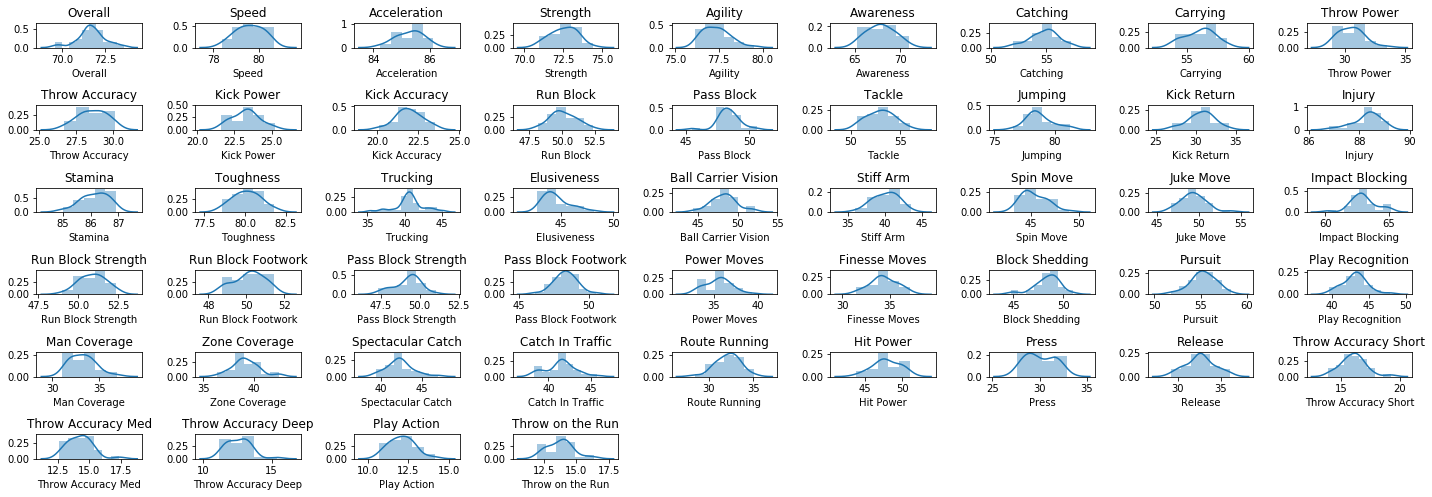

In [16]:
f = plt.figure(figsize=(20,10))
counter = 1

for i in madden_correlation_17.columns[1:50]:
    ax = f.add_subplot(9,9,counter)
    sns.distplot(madden_correlation_17[i])
    plt.title(i)
    counter+=1
    
plt.tight_layout()

In [17]:
madden_correlation_17.columns[1:50]

Index(['Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Run Block Strength',
       'Run Block Footwork', 'Pass Block Strength', 'Pass Block Footwork',
       'Power Moves', 'Finesse Moves', 'Block Shedding', 'Pursuit',
       'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Med',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run'],
      dtype='object')

In [18]:
# Store Values
linear_corr = []
linear_feature_name_17 = []
tau_corr = []
tau_feature_name_17 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_17.columns[1:50]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_17['Result'], madden_correlation_17[col])
    linear_corr.append(l)
    linear_feature_name_17.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_17['Result'], madden_correlation_17[col])
    tau_corr.append(n)
    tau_feature_name_17.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_17 = sorted(zip(linear_corr, linear_feature_name_17))
nonlinear_corr_scores_17 = sorted(zip(tau_corr, tau_feature_name_17))

In [19]:
highest_correlated_features.append(linear_corr_scores_17[-5:])
linear_corr_scores_17[-5:]

[(0.3439800276665252, 'Release'),
 (0.3487472795994084, 'Juke Move'),
 (0.3666700878377454, 'Spin Move'),
 (0.3684584951816935, 'Catch In Traffic'),
 (0.41630120316779023, 'Spectacular Catch')]

In [20]:
highest_correlated_features.append(linear_corr_scores_17[0:5])
linear_corr_scores_17[0:5]

[(-0.5114828314675527, 'Impact Blocking'),
 (-0.4539929481109093, 'Power Moves'),
 (-0.365756779880339, 'Awareness'),
 (-0.34025962398989806, 'Run Block Footwork'),
 (-0.33497319688606525, 'Run Block Strength')]

In [21]:
highest_correlated_features.append(nonlinear_corr_scores_17[-5:])
nonlinear_corr_scores_17[-5:]

[(0.2778794956290728, 'Jumping'),
 (0.30067723154535786, 'Release'),
 (0.3102538057994502, 'Spectacular Catch'),
 (0.326440960884639, 'Speed'),
 (0.3267705328624541, 'Catching')]

In [22]:
highest_correlated_features.append(nonlinear_corr_scores_17[0:5])
nonlinear_corr_scores_17[0:5]

[(-0.3372323976080981, 'Impact Blocking'),
 (-0.29496001981257514, 'Pass Block Strength'),
 (-0.28384806637363447, 'Pass Block Footwork'),
 (-0.26465712578942563, 'Injury'),
 (-0.2624873570809155, 'Overall')]

### 2016

In [25]:
madden_17 = pd.read_csv('data/madden_17.csv')

In [26]:
madden_17.columns

Index(['Team', 'Last Name', 'First Name', 'Position', 'Overall', 'Speed',
       'Strength', 'Agility', 'Acceleration', 'Awareness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Carrying', 'Catching', 'Route Running',
       'Catch In Traffic', 'Spectacular Catch', 'Release', 'Jumping',
       'Throw Power', 'Throw Accuracy', 'Throw Accuracy Short',
       'Throw Accuracy Med', 'Throw Accuracy Deep', 'Throw On The Run',
       'Play Action', 'Tackle', 'Hit Power', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Press', 'Kick Power', 'Kick Accuracy',
       'Impact Blocking', 'Run Block', 'Pass Block', 'Kick Return',
       'Toughness', 'Stamina', 'Injury'],
      dtype='object')

In [27]:
madden_17_df = madden_17[['Team','Overall', 'Speed',
       'Strength', 'Agility', 'Acceleration', 'Awareness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Carrying', 'Catching', 'Route Running',
       'Catch In Traffic', 'Spectacular Catch', 'Release', 'Jumping',
       'Throw Power', 'Throw Accuracy', 'Throw Accuracy Short',
       'Throw Accuracy Med', 'Throw Accuracy Deep', 'Throw On The Run',
       'Play Action', 'Tackle', 'Hit Power', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Press', 'Kick Power', 'Kick Accuracy',
       'Impact Blocking', 'Run Block', 'Pass Block', 'Kick Return',
       'Toughness', 'Stamina', 'Injury']]

In [28]:
madden_17_by_team = madden_17_df.groupby('Team').mean().reset_index()
madden_17_by_team.head()

,Team,Overall,Speed,Strength,Agility,Acceleration,Awareness,Trucking,Elusiveness,Ball Carrier Vision,...,Press,Kick Power,Kick Accuracy,Impact Blocking,Run Block,Pass Block,Kick Return,Toughness,Stamina,Injury
0,49ers,70.135135,78.351351,71.405405,76.418919,84.013514,65.729730,40.824324,43.905405,47.000000,...,30.229730,23.662162,23.108108,49.986486,51.567568,49.635135,29.797297,79.756757,85.027027,87.216216
1,Bears,69.675676,79.351351,69.243243,77.229730,85.067568,65.891892,39.418919,42.959459,48.500000,...,29.648649,22.054054,21.297297,46.878378,47.594595,45.689189,30.716216,78.675676,85.986486,88.121622
2,Bengals,71.635135,78.391892,72.283784,76.135135,83.945946,66.337838,38.905405,42.986486,45.121622,...,30.391892,23.162162,21.837838,48.567568,50.337838,48.243243,27.756757,80.162162,86.797297,88.527027
3,Bills,72.351351,78.743243,69.932432,77.445946,84.229730,68.391892,39.378378,44.256757,48.486486,...,31.689189,24.432432,23.837838,50.054054,50.148649,48.486486,31.013514,78.837838,85.175676,88.256757
4,Broncos,70.702703,78.148649,72.027027,76.540541,84.364865,64.702703,39.581081,42.040541,44.581081,...,27.743243,23.986486,22.837838,50.175676,50.081081,48.500000,28.905405,79.959459,86.094595,87.337838


In [29]:
afc_2016 = pd.read_csv('data/2016_afc_standings.csv')
afc_2016_results = afc_2016[['Team', 'Result']]

In [30]:
nfc_2016 = pd.read_csv('data/2016_nfc_standings.csv')
nfc_2016_results = nfc_2016[['Team', 'Result']]

In [31]:
nfl_standings_2016 = nfc_2016_results.merge(afc_2016_results, how='outer')
nfl_standings_2016.head()

,Team,Result
0,Falcons,2
1,Cowboys,4
2,Seahawks,4
3,Packers,3
4,Giants,4


In [32]:
madden_correlation_16 = madden_17_by_team.merge(nfl_standings_2016, how='outer')
madden_correlation_16.head()

,Team,Overall,Speed,Strength,Agility,Acceleration,Awareness,Trucking,Elusiveness,Ball Carrier Vision,...,Kick Power,Kick Accuracy,Impact Blocking,Run Block,Pass Block,Kick Return,Toughness,Stamina,Injury,Result
0,49ers,70.135135,78.351351,71.405405,76.418919,84.013514,65.729730,40.824324,43.905405,47.000000,...,23.662162,23.108108,49.986486,51.567568,49.635135,29.797297,79.756757,85.027027,87.216216,5
1,Bears,69.675676,79.351351,69.243243,77.229730,85.067568,65.891892,39.418919,42.959459,48.500000,...,22.054054,21.297297,46.878378,47.594595,45.689189,30.716216,78.675676,85.986486,88.121622,5
2,Bengals,71.635135,78.391892,72.283784,76.135135,83.945946,66.337838,38.905405,42.986486,45.121622,...,23.162162,21.837838,48.567568,50.337838,48.243243,27.756757,80.162162,86.797297,88.527027,5
3,Bills,72.351351,78.743243,69.932432,77.445946,84.229730,68.391892,39.378378,44.256757,48.486486,...,24.432432,23.837838,50.054054,50.148649,48.486486,31.013514,78.837838,85.175676,88.256757,5
4,Broncos,70.702703,78.148649,72.027027,76.540541,84.364865,64.702703,39.581081,42.040541,44.581081,...,23.986486,22.837838,50.175676,50.081081,48.500000,28.905405,79.959459,86.094595,87.337838,5


In [33]:
len(madden_correlation_16.columns)

47

In [34]:
# Store Values
linear_corr = []
linear_feature_name_16 = []
tau_corr = []
tau_feature_name_16 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_16.columns[1:46]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_16['Result'], madden_correlation_16[col])
    linear_corr.append(l)
    linear_feature_name_16.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_16['Result'], madden_correlation_16[col])
    tau_corr.append(n)
    tau_feature_name_16.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_16 = sorted(zip(linear_corr, linear_feature_name_16))
nonlinear_corr_scores_16 = sorted(zip(tau_corr, tau_feature_name_16))

In [35]:
highest_correlated_features.append(linear_corr_scores_16[-5:])
linear_corr_scores_16[-5:]

[(0.13226979687697227, 'Ball Carrier Vision'),
 (0.17068852968456327, 'Agility'),
 (0.19471635301651713, 'Spin Move'),
 (0.22115701126520818, 'Elusiveness'),
 (0.27440940738354325, 'Juke Move')]

In [36]:
highest_correlated_features.append(linear_corr_scores_16[0:5])
linear_corr_scores_16[0:5]

[(-0.48636687436349296, 'Stiff Arm'),
 (-0.3645940016432438, 'Overall'),
 (-0.36100782200294507, 'Injury'),
 (-0.34809285141639246, 'Pass Block'),
 (-0.33854743089364353, 'Hit Power')]

In [37]:
highest_correlated_features.append(nonlinear_corr_scores_16[-5:])
nonlinear_corr_scores_16[-5:]

[(0.07298950278179173, 'Play Recognition'),
 (0.08641865331899612, 'Ball Carrier Vision'),
 (0.09731933704238896, 'Man Coverage'),
 (0.11600794477718573, 'Zone Coverage'),
 (0.11612506539740103, 'Elusiveness')]

In [38]:
highest_correlated_features.append(nonlinear_corr_scores_16[0:5])
nonlinear_corr_scores_16[0:5]

[(-0.37500242614020507, 'Stiff Arm'),
 (-0.32136936703001684, 'Hit Power'),
 (-0.288670932352532, 'Pass Block'),
 (-0.22144779912992757, 'Injury'),
 (-0.19694372020312928, 'Power Moves')]

### 2015

In [40]:
madden_16 = pd.read_csv('data/madden_16.csv')

In [41]:
madden_16.columns

Index(['Team', 'First Name', 'Last Name', 'Position', 'Jersey Number',
       'Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy Short',
       'Throw Accuracy Med', 'Throw Accuracy Deep', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release', 'Play Action',
       'Throw On The Run', 'Height', 'Weight'],
      dtype='object')

In [42]:
madden_16_df = madden_16[['Team', 'Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy Short',
       'Throw Accuracy Med', 'Throw Accuracy Deep', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release', 'Play Action',
       'Throw On The Run']]

In [43]:
len(madden_16_df.columns)

45

In [44]:
madden_16_by_team = madden_16_df.groupby('Team').mean().reset_index()
madden_16_by_team.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Man Coverage,Zone Coverage,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Play Action,Throw On The Run
0,49ers,73.069444,78.722222,84.388889,71.291667,76.750000,65.388889,55.638889,58.319444,31.763889,...,33.458333,40.791667,40.277778,39.583333,30.277778,45.930556,31.069444,33.458333,11.722222,13.722222
1,Bears,73.000000,77.375000,84.527778,70.041667,73.861111,68.250000,51.500000,56.305556,31.555556,...,33.888889,39.166667,38.083333,37.541667,29.472222,45.083333,28.097222,32.361111,12.888889,14.652778
2,Bengals,74.391892,79.162162,85.189189,71.391892,76.729730,68.202703,56.027027,58.337838,32.297297,...,35.202703,41.743243,42.770270,40.932432,31.297297,45.729730,31.405405,34.121622,12.851351,14.905405
3,Bills,73.219178,78.794521,84.821918,70.068493,77.232877,67.547945,56.410959,59.602740,32.301370,...,34.534247,40.095890,42.726027,41.876712,32.794521,42.301370,30.712329,36.602740,11.260274,13.246575
4,Broncos,73.346667,79.066667,84.280000,68.986667,76.720000,68.093333,54.253333,57.373333,31.426667,...,32.760000,39.773333,40.693333,37.933333,29.960000,43.213333,29.373333,33.093333,11.653333,13.146667


In [47]:
afc_2015 = pd.read_csv('data/2015_afc_standings.csv')
afc_2015_results = afc_2015[['Team', 'Result']]

In [48]:
nfc_2015 = pd.read_csv('data/2015_nfc_standings.csv')
nfc_2015_results = nfc_2015[['Team', 'Result']]

In [49]:
nfl_standings_2015 = nfc_2015_results.merge(afc_2015_results, how='outer')
nfl_standings_2015.head()

,Team,Result
0,Panthers,2
1,Cardinals,3
2,Vikings,4
3,Redskins,4
4,Packers,4


In [50]:
madden_correlation_15 = madden_16_by_team.merge(nfl_standings_2015, how='outer')
madden_correlation_15.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Zone Coverage,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Play Action,Throw On The Run,Result
0,49ers,73.069444,78.722222,84.388889,71.291667,76.750000,65.388889,55.638889,58.319444,31.763889,...,40.791667,40.277778,39.583333,30.277778,45.930556,31.069444,33.458333,11.722222,13.722222,5
1,Bears,73.000000,77.375000,84.527778,70.041667,73.861111,68.250000,51.500000,56.305556,31.555556,...,39.166667,38.083333,37.541667,29.472222,45.083333,28.097222,32.361111,12.888889,14.652778,5
2,Bengals,74.391892,79.162162,85.189189,71.391892,76.729730,68.202703,56.027027,58.337838,32.297297,...,41.743243,42.770270,40.932432,31.297297,45.729730,31.405405,34.121622,12.851351,14.905405,4
3,Bills,73.219178,78.794521,84.821918,70.068493,77.232877,67.547945,56.410959,59.602740,32.301370,...,40.095890,42.726027,41.876712,32.794521,42.301370,30.712329,36.602740,11.260274,13.246575,5
4,Broncos,73.346667,79.066667,84.280000,68.986667,76.720000,68.093333,54.253333,57.373333,31.426667,...,39.773333,40.693333,37.933333,29.960000,43.213333,29.373333,33.093333,11.653333,13.146667,1


In [51]:
madden_correlation_15.columns[1:45]

Index(['Overall', 'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness',
       'Catching', 'Carrying', 'Throw Power', 'Throw Accuracy Short',
       'Throw Accuracy Med', 'Throw Accuracy Deep', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release', 'Play Action',
       'Throw On The Run'],
      dtype='object')

In [52]:
# Store Values
linear_corr = []
linear_feature_name_15 = []
tau_corr = []
tau_feature_name_15 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_15.columns[1:45]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_15['Result'], madden_correlation_15[col])
    linear_corr.append(l)
    linear_feature_name_15.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_15['Result'], madden_correlation_15[col])
    tau_corr.append(n)
    tau_feature_name_15.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_15 = sorted(zip(linear_corr, linear_feature_name_15))
nonlinear_corr_scores_15 = sorted(zip(tau_corr, tau_feature_name_15))
len(linear_corr_scores_15)

44

In [53]:
highest_correlated_features.append(linear_corr_scores_15[-5:])
linear_corr_scores_15[-5:]

[(0.18068573681907074, 'Kick Power'),
 (0.18248807828595803, 'Ball Carrier Vision'),
 (0.1838797579174674, 'Kick Accuracy'),
 (0.22519891392330874, 'Spin Move'),
 (0.3070752946396232, 'Kick Return')]

In [54]:
highest_correlated_features.append(linear_corr_scores_15[0:5])
linear_corr_scores_15[0:5]

[(-0.2569428191667657, 'Zone Coverage'),
 (-0.2324854683438653, 'Toughness'),
 (-0.21917192437562183, 'Block Shedding'),
 (-0.16967541644752848, 'Overall'),
 (-0.1595591101394916, 'Pursuit')]

In [55]:
highest_correlated_features.append(nonlinear_corr_scores_15[-5:])
nonlinear_corr_scores_15[-5:]

[(0.12679938150064488, 'Route Running'),
 (0.15377797330929274, 'Spin Move'),
 (0.16203497497311772, 'Kick Power'),
 (0.19154800184139972, 'Ball Carrier Vision'),
 (0.2293180303735067, 'Kick Return')]

In [56]:
highest_correlated_features.append(nonlinear_corr_scores_15[0:5])
nonlinear_corr_scores_15[0:5]

[(-0.30485808743772064, 'Strength'),
 (-0.26708805890561366, 'Power Moves'),
 (-0.2616923405438841, 'Tackle'),
 (-0.23471374873523626, 'Block Shedding'),
 (-0.21313087528831798, 'Zone Coverage')]

### 2014

In [58]:
madden_15 = pd.read_csv('data/madden_15.csv')

In [59]:
madden_15.columns

Index(['Team', 'First', 'Last', 'Position', 'Jersey', 'Overall', 'Speed',
       'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Pursuit', 'Play Recognition',
       'Man Coverage', 'Zone Coverage', 'Spectacular Catch',
       'Catch In Traffic', 'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Med', 'Throw Accuracy Short', 'Throw Accuracy Deep',
       'Play Action', 'Throw on Run'],
      dtype='object')

In [60]:
madden_15_df = madden_15[['Team','Overall', 'Speed',
       'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Pursuit', 'Play Recognition',
       'Man Coverage', 'Zone Coverage', 'Spectacular Catch',
       'Catch In Traffic', 'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Med', 'Throw Accuracy Short', 'Throw Accuracy Deep',
       'Play Action', 'Throw on Run']]

In [61]:
len(madden_15_df.columns)

45

In [62]:
madden_15_by_team = madden_15_df.groupby('Team').mean().reset_index()
madden_15_by_team.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Med,Throw Accuracy Short,Throw Accuracy Deep,Play Action,Throw on Run
0,49ers,75.794521,78.095890,83.726027,71.794521,77.068493,67.904110,54.767123,58.452055,30.493151,...,40.219178,31.301370,45.164384,30.876712,34.780822,15.698630,13.945205,11.958904,11.123288,13.136986
1,Bears,72.763889,75.875000,81.277778,71.000000,74.555556,67.416667,53.083333,57.194444,30.958333,...,37.347222,29.722222,48.250000,30.444444,32.305556,15.972222,14.597222,12.902778,11.583333,14.277778
2,Bengals,73.506849,78.342466,82.821918,70.890411,76.958904,66.849315,54.041096,59.260274,31.150685,...,39.657534,30.739726,43.876712,30.835616,33.917808,16.794521,14.863014,13.095890,11.575342,13.287671
3,Bills,74.057971,78.144928,82.710145,70.768116,77.043478,66.811594,55.376812,58.028986,32.173913,...,39.478261,32.681159,39.884058,28.579710,37.159420,16.318841,14.623188,12.333333,10.637681,13.826087
4,Broncos,75.314286,77.128571,81.985714,70.742857,75.842857,68.728571,53.971429,56.385714,30.057143,...,37.714286,30.157143,45.914286,32.028571,31.200000,15.242857,13.542857,11.671429,11.400000,12.857143


In [65]:
afc_2014 = pd.read_csv('data/2014_afc_standings.csv')
afc_2014_results = afc_2014[['Team', 'Result']]

In [66]:
nfc_2014 = pd.read_csv('data/2014_nfc_standings.csv')
nfc_2014_results = nfc_2014[['Team', 'Result']]

In [67]:
nfl_standings_2014 = nfc_2014_results.merge(afc_2014_results, how='outer')
nfl_standings_2014.head()

,Team,Result
0,Seahawks,2
1,Packers,3
2,Cowboys,4
3,Panthers,4
4,Cardinals,4


In [68]:
madden_correlation_14 = madden_15_by_team.merge(nfl_standings_2014, how='outer')
madden_correlation_14.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Route Running,Hit Power,Press,Release,Throw Accuracy Med,Throw Accuracy Short,Throw Accuracy Deep,Play Action,Throw on Run,Result
0,49ers,75.794521,78.095890,83.726027,71.794521,77.068493,67.904110,54.767123,58.452055,30.493151,...,31.301370,45.164384,30.876712,34.780822,15.698630,13.945205,11.958904,11.123288,13.136986,5
1,Bears,72.763889,75.875000,81.277778,71.000000,74.555556,67.416667,53.083333,57.194444,30.958333,...,29.722222,48.250000,30.444444,32.305556,15.972222,14.597222,12.902778,11.583333,14.277778,5
2,Bengals,73.506849,78.342466,82.821918,70.890411,76.958904,66.849315,54.041096,59.260274,31.150685,...,30.739726,43.876712,30.835616,33.917808,16.794521,14.863014,13.095890,11.575342,13.287671,4
3,Bills,74.057971,78.144928,82.710145,70.768116,77.043478,66.811594,55.376812,58.028986,32.173913,...,32.681159,39.884058,28.579710,37.159420,16.318841,14.623188,12.333333,10.637681,13.826087,5
4,Broncos,75.314286,77.128571,81.985714,70.742857,75.842857,68.728571,53.971429,56.385714,30.057143,...,30.157143,45.914286,32.028571,31.200000,15.242857,13.542857,11.671429,11.400000,12.857143,4


In [69]:
len(madden_correlation_14.columns)

44

In [70]:
# Store Values
linear_corr = []
linear_feature_name_14 = []
tau_corr = []
tau_feature_name_14 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_14.columns[1:43]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_14['Result'], madden_correlation_14[col])
    linear_corr.append(l)
    linear_feature_name_14.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_14['Result'], madden_correlation_14[col])
    tau_corr.append(n)
    tau_feature_name_14.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_14 = sorted(zip(linear_corr, linear_feature_name_14))
nonlinear_corr_scores_14 = sorted(zip(tau_corr, tau_feature_name_14))
len(linear_corr_scores_14)

42

In [71]:
highest_correlated_features.append(linear_corr_scores_14[-5:])
linear_corr_scores_14[-5:]

[(0.20779032542728712, 'Juke Move'),
 (0.22215807985855396, 'Throw Accuracy Med'),
 (0.22780967280316036, 'Throw Accuracy Short'),
 (0.23158656054804133, 'Throw Accuracy Deep'),
 (0.38423137780056205, 'Elusiveness')]

In [72]:
highest_correlated_features.append(linear_corr_scores_14[0:5])
linear_corr_scores_14[0:5]

[(-0.489435249787921, 'Overall'),
 (-0.4250307174860231, 'Power Moves'),
 (-0.3862406724570055, 'Strength'),
 (-0.34349058611045913, 'Tackle'),
 (-0.3158276925381496, 'Block Shedding')]

In [73]:
highest_correlated_features.append(nonlinear_corr_scores_14[-5:])
nonlinear_corr_scores_14[-5:]

[(0.14838225494756316, 'Kick Return'),
 (0.16996512839448144, 'Throw Accuracy Med'),
 (0.16996512839448144, 'Throw Accuracy Short'),
 (0.18615228347967014, 'Throw Accuracy Deep'),
 (0.19154800184139972, 'Elusiveness')]

In [74]:
highest_correlated_features.append(nonlinear_corr_scores_14[0:5])
nonlinear_corr_scores_14[0:5]

[(-0.3210452425229094, 'Power Moves'),
 (-0.3156495241611798, 'Overall'),
 (-0.23471374873523626, 'Catching'),
 (-0.21852659365004753, 'Strength'),
 (-0.19694372020312928, 'Tackle')]

### 2013

In [75]:
madden_14 = pd.read_csv('data/madden_14.csv')

In [76]:
madden_14.columns

Index(['Team', 'First Name', 'Last Name', 'Position', 'Jersey', 'Overall',
       'Speed', 'Strength', 'Agility', 'Awareness', 'Catching', 'Carrying',
       'Throw Power', 'Throw Accuracy', 'Kick Power', 'Kick Accuracy',
       'Run Block', 'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury',
       'Stamina', 'Toughness', 'Age', 'Years Pro', 'College', 'Home State',
       'Hometown', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork', 'Run Block.1',
       'Pass Block Strength', 'Pass Block Footwork', 'Pass Block.1',
       'Power Moves', 'Finesse Moves', 'Block Shedding', 'Pursuit',
       'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Med',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run'],
      dt

In [77]:
madden_14_df = madden_14[['Team','Overall',
       'Speed', 'Strength', 'Agility', 'Awareness', 'Catching', 'Carrying',
       'Throw Power', 'Throw Accuracy', 'Kick Power', 'Kick Accuracy',
       'Run Block', 'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury',
       'Stamina', 'Toughness', 'Age', 'Years Pro', 'College', 'Home State',
       'Hometown', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork',
       'Pass Block Strength', 'Pass Block Footwork',
       'Power Moves', 'Finesse Moves', 'Block Shedding', 'Pursuit',
       'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Med',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run']]

In [78]:
len(madden_14_df.columns)

54

In [79]:
madden_14_by_team = madden_14_df.groupby('Team').mean().reset_index()
madden_14_by_team.head()

,Team,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Throw Accuracy,...,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on the Run
0,49ers,75.847222,77.972222,71.222222,77.250000,68.930556,54.152778,58.958333,30.527778,29.500000,...,40.694444,32.750000,46.166667,31.041667,35.291667,16.180556,14.319444,11.875000,11.013889,13.347222
1,Bears,72.945205,76.095890,71.712329,75.000000,67.287671,52.506849,56.821918,29.136986,27.972603,...,36.109589,29.342466,48.863014,31.520548,31.424658,12.369863,11.123288,9.767123,8.931507,10.794521
2,Bengals,74.680556,77.208333,71.638889,76.694444,66.847222,52.875000,58.638889,31.097222,28.833333,...,38.500000,32.458333,41.777778,29.361111,34.458333,16.861111,14.875000,13.166667,11.208333,13.486111
3,Bills,70.959459,76.283784,70.851351,75.662162,62.932432,51.040541,56.148649,29.432432,28.162162,...,36.567568,30.229730,40.824324,26.135135,33.500000,14.959459,13.094595,11.216216,9.594595,12.635135
4,Broncos,74.205882,76.220588,70.794118,75.455882,67.117647,52.397059,56.735294,29.279412,28.338235,...,36.838235,31.691176,43.014706,30.191176,32.485294,15.352941,13.558824,11.647059,10.323529,12.205882


In [82]:
afc_2013 = pd.read_csv('data/2013_afc_standings.csv')
afc_2013_results = afc_2013[['Team', 'Result']]

In [83]:
nfc_2013 = pd.read_csv('data/2013_nfc_standings.csv')
nfc_2013_results = nfc_2013[['Team', 'Result']]

In [84]:
nfl_standings_2013 = nfc_2013_results.merge(afc_2013_results, how='outer')
nfl_standings_2013.head()

,Team,Result
0,Seahawks,1
1,Panthers,4
2,Eagles,4
3,Packers,4
4,49ers,3


In [85]:
madden_correlation_13 = madden_14_by_team.merge(nfl_standings_2013, how='outer')
madden_correlation_13.head()

,Team,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,Throw Accuracy,...,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on the Run,Result
0,49ers,75.847222,77.972222,71.222222,77.250000,68.930556,54.152778,58.958333,30.527778,29.500000,...,32.750000,46.166667,31.041667,35.291667,16.180556,14.319444,11.875000,11.013889,13.347222,3
1,Bears,72.945205,76.095890,71.712329,75.000000,67.287671,52.506849,56.821918,29.136986,27.972603,...,29.342466,48.863014,31.520548,31.424658,12.369863,11.123288,9.767123,8.931507,10.794521,5
2,Bengals,74.680556,77.208333,71.638889,76.694444,66.847222,52.875000,58.638889,31.097222,28.833333,...,32.458333,41.777778,29.361111,34.458333,16.861111,14.875000,13.166667,11.208333,13.486111,4
3,Bills,70.959459,76.283784,70.851351,75.662162,62.932432,51.040541,56.148649,29.432432,28.162162,...,30.229730,40.824324,26.135135,33.500000,14.959459,13.094595,11.216216,9.594595,12.635135,5
4,Broncos,74.205882,76.220588,70.794118,75.455882,67.117647,52.397059,56.735294,29.279412,28.338235,...,31.691176,43.014706,30.191176,32.485294,15.352941,13.558824,11.647059,10.323529,12.205882,2


In [86]:
len(madden_correlation_13.columns)

52

In [87]:
# Store Values
linear_corr = []
linear_feature_name_13 = []
tau_corr = []
tau_feature_name_13 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_13.columns[1:51]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_13['Result'], madden_correlation_13[col])
    linear_corr.append(l)
    linear_feature_name_13.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_13['Result'], madden_correlation_13[col])
    tau_corr.append(n)
    tau_feature_name_13.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_13 = sorted(zip(linear_corr, linear_feature_name_13))
nonlinear_corr_scores_13 = sorted(zip(tau_corr, tau_feature_name_13))
len(linear_corr_scores_13)

50

In [88]:
highest_correlated_features.append(linear_corr_scores_13[-5:])
linear_corr_scores_13[-5:]

[(0.1200773261342861, 'Kick Accuracy'),
 (0.22946083448307583, 'Pass Block Footwork'),
 (0.23051801690784854, 'Pass Block'),
 (0.23465243559980636, 'Pass Block Strength'),
 (0.2434767420651007, 'Injury')]

In [89]:
highest_correlated_features.append(linear_corr_scores_13[0:5])
linear_corr_scores_13[0:5]

[(-0.5109435526127095, 'Overall'),
 (-0.37382901178303873, 'Toughness'),
 (-0.36869718511538213, 'Awareness'),
 (-0.3654047551643938, 'Catch In Traffic'),
 (-0.35293667023497477, 'Block Shedding')]

In [90]:
highest_correlated_features.append(nonlinear_corr_scores_13[-5:])
nonlinear_corr_scores_13[-5:]

[(0.06744647952161961, 'Throw Accuracy'),
 (0.07823791624507875, 'Finesse Moves'),
 (0.11600794477718573, 'Pass Block'),
 (0.18615228347967014, 'Injury'),
 (0.19694372020312928, 'Kick Accuracy')]

In [91]:
highest_correlated_features.append(nonlinear_corr_scores_13[0:5])
nonlinear_corr_scores_13[0:5]

[(-0.4190138122658414, 'Overall'),
 (-0.35881527105501637, 'Awareness'),
 (-0.3372323976080981, 'Route Running'),
 (-0.3102538057994502, 'Catch In Traffic'),
 (-0.2940666507142615, 'Block Shedding')]

### 2012

In [92]:
madden_13 = pd.read_csv('data/madden_13.csv')

In [93]:
madden_13.columns

Index(['Team', 'First Name', 'Last Name', 'Position', 'Overall', 'Speed',
       'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Throw on Run'],
      dtype='object')

In [94]:
madden_13_df = madden_13[['Team','Overall', 'Speed',
       'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Power Moves', 'Finesse Moves',
       'Block Shedding', 'Pursuit', 'Play Recognition', 'Man Coverage',
       'Zone Coverage', 'Spectacular Catch', 'Catch In Traffic',
       'Route Running', 'Hit Power', 'Press', 'Release',
       'Throw Accuracy Short', 'Throw Accuracy Med', 'Throw Accuracy Deep',
       'Play Action', 'Throw on Run']]

In [95]:
len(madden_13_df.columns)

46

In [96]:
madden_13_by_team = madden_13_df.groupby('Team').mean().reset_index()
madden_13_by_team.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on Run
0,49ers,72.849315,78.205479,83.821918,70.917808,77.356164,65.000000,53.630137,57.945205,29.178082,...,37.616438,31.109589,44.493151,29.315068,31.808219,15.356164,13.561644,11.068493,10.095890,12.328767
1,Bears,71.500000,76.716216,81.783784,70.378378,75.459459,65.500000,52.445946,56.202703,27.729730,...,36.364865,31.094595,45.824324,29.432432,31.486486,12.648649,11.378378,9.689189,9.175676,10.810811
2,Bengals,71.891892,76.283784,82.027027,71.810811,76.432432,64.297297,51.297297,57.202703,27.986486,...,36.891892,30.972973,44.229730,30.864865,32.972973,14.540541,12.500000,10.513514,10.270270,11.297297
3,Bills,72.337838,75.445946,81.229730,71.770270,75.081081,65.202703,50.081081,55.945946,30.378378,...,34.256757,29.783784,44.621622,27.229730,32.216216,15.432432,13.891892,11.743243,10.189189,13.216216
4,Broncos,71.081081,76.932432,81.121622,68.891892,75.972973,64.364865,52.270270,55.851351,30.229730,...,36.675676,31.513514,40.702703,29.891892,31.527027,15.324324,13.283784,11.567568,10.540541,12.418919


In [98]:
afc_2012 = pd.read_csv('data/2012_afc_standings.csv')
afc_2012_results = afc_2012[['Team', 'Result']]

In [99]:
nfc_2012 = pd.read_csv('data/2012_nfc_standings.csv')
nfc_2012_results = nfc_2012[['Team', 'Result']]

In [100]:
nfl_standings_2012 = nfc_2012_results.merge(afc_2012_results, how='outer')
nfl_standings_2012.head()

,Team,Result
0,Falcons,3
1,49ers,2
2,Packers,4
3,Redskins,4
4,Seahawks,4


In [101]:
madden_correlation_12 = madden_13_by_team.merge(nfl_standings_2012, how='outer')
madden_correlation_12.head()

,Team,Overall,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action,Throw on Run,Result
0,49ers,72.849315,78.205479,83.821918,70.917808,77.356164,65.000000,53.630137,57.945205,29.178082,...,31.109589,44.493151,29.315068,31.808219,15.356164,13.561644,11.068493,10.095890,12.328767,2
1,Bears,71.500000,76.716216,81.783784,70.378378,75.459459,65.500000,52.445946,56.202703,27.729730,...,31.094595,45.824324,29.432432,31.486486,12.648649,11.378378,9.689189,9.175676,10.810811,5
2,Bengals,71.891892,76.283784,82.027027,71.810811,76.432432,64.297297,51.297297,57.202703,27.986486,...,30.972973,44.229730,30.864865,32.972973,14.540541,12.500000,10.513514,10.270270,11.297297,4
3,Bills,72.337838,75.445946,81.229730,71.770270,75.081081,65.202703,50.081081,55.945946,30.378378,...,29.783784,44.621622,27.229730,32.216216,15.432432,13.891892,11.743243,10.189189,13.216216,5
4,Broncos,71.081081,76.932432,81.121622,68.891892,75.972973,64.364865,52.270270,55.851351,30.229730,...,31.513514,40.702703,29.891892,31.527027,15.324324,13.283784,11.567568,10.540541,12.418919,4


In [102]:
len(madden_correlation_12.columns)

47

In [103]:
# Store Values
linear_corr = []
linear_feature_name_12 = []
tau_corr = []
tau_feature_name_12 = []
corr = []
corr_features = []

# Calculate Values
for col in madden_correlation_12.columns[1:46]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(madden_correlation_12['Result'], madden_correlation_12[col])
    linear_corr.append(l)
    linear_feature_name_12.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(madden_correlation_12['Result'], madden_correlation_12[col])
    tau_corr.append(n)
    tau_feature_name_12.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_12 = sorted(zip(linear_corr, linear_feature_name_12))
nonlinear_corr_scores_12 = sorted(zip(tau_corr, tau_feature_name_12))
len(linear_corr_scores_12)

45

In [104]:
highest_correlated_features.append(linear_corr_scores_12[-5:])
linear_corr_scores_12[-5:]

[(0.09135148427706691, 'Power Moves'),
 (0.1348553732990604, 'Pursuit'),
 (0.22875629501159947, 'Injury'),
 (0.30603965183135895, 'Kick Accuracy'),
 (0.322989129341428, 'Finesse Moves')]

In [105]:
highest_correlated_features.append(linear_corr_scores_13[0:5])
linear_corr_scores_13[0:5]

[(-0.5109435526127095, 'Overall'),
 (-0.37382901178303873, 'Toughness'),
 (-0.36869718511538213, 'Awareness'),
 (-0.3654047551643938, 'Catch In Traffic'),
 (-0.35293667023497477, 'Block Shedding')]

In [106]:
highest_correlated_features.append(nonlinear_corr_scores_12[-5:])
nonlinear_corr_scores_12[-5:]

[(0.09442507133026745, 'Run Block'),
 (0.094520402067652, 'Kick Accuracy'),
 (0.18075656511794055, 'Pursuit'),
 (0.1838254144134014, 'Injury'),
 (0.22167182326321933, 'Finesse Moves')]

In [107]:
highest_correlated_features.append(nonlinear_corr_scores_13[0:5])
nonlinear_corr_scores_13[0:5]

[(-0.4190138122658414, 'Overall'),
 (-0.35881527105501637, 'Awareness'),
 (-0.3372323976080981, 'Route Running'),
 (-0.3102538057994502, 'Catch In Traffic'),
 (-0.2940666507142615, 'Block Shedding')]

### Combining

In [108]:
common_cols = []

for col in madden_correlation_17.columns:
    if col in madden_correlation_17.columns and col in madden_correlation_16.columns and\
    col in madden_correlation_15.columns and\
    col in madden_correlation_14.columns and\
    col in madden_correlation_13.columns and\
    col in madden_correlation_12.columns:
        common_cols.append(col) 

In [109]:
combined_df = madden_correlation_12[common_cols].merge(madden_correlation_13[common_cols], how='outer')\
            .merge(madden_correlation_14[common_cols], how='outer')\
            .merge(madden_correlation_15[common_cols], how='outer')\
            .merge(madden_correlation_16[common_cols], how='outer')\
            .merge(madden_correlation_17[common_cols], how='outer')

In [110]:
common_cols

['Team',
 'Overall',
 'Speed',
 'Strength',
 'Agility',
 'Awareness',
 'Catching',
 'Carrying',
 'Throw Power',
 'Run Block',
 'Pass Block',
 'Tackle',
 'Jumping',
 'Kick Return',
 'Injury',
 'Stamina',
 'Toughness',
 'Trucking',
 'Elusiveness',
 'Ball Carrier Vision',
 'Stiff Arm',
 'Spin Move',
 'Juke Move',
 'Impact Blocking',
 'Power Moves',
 'Finesse Moves',
 'Block Shedding',
 'Pursuit',
 'Play Recognition',
 'Man Coverage',
 'Zone Coverage',
 'Spectacular Catch',
 'Catch In Traffic',
 'Route Running',
 'Hit Power',
 'Press',
 'Release',
 'Throw Accuracy Short',
 'Throw Accuracy Med',
 'Throw Accuracy Deep',
 'Play Action',
 'Result']

In [111]:
len(combined_df.columns)

42

In [112]:
# Store Values
linear_corr = []
linear_feature_name_combined = []
tau_corr = []
tau_feature_name_combined = []
corr = []
corr_features = []

# Calculate Values
for col in combined_df.columns[1:41]:
    
    # Pearson Correlation (Linear)
    l, p = stats.pearsonr(combined_df['Result'], combined_df[col])
    linear_corr.append(l)
    linear_feature_name_combined.append(col)
    
    # Kendall Tau Correlation (Nonlinear)
    n, p = stats.kendalltau(combined_df['Result'], combined_df[col])
    tau_corr.append(n)
    tau_feature_name_combined.append(col)
    
    # Features and Scores
    corr.append(max(n, l))
    corr_features.append(col)
    
linear_corr_scores_combined = sorted(zip(linear_corr, linear_feature_name_combined))
nonlinear_corr_scores_combined = sorted(zip(tau_corr, tau_feature_name_combined))

In [113]:
linear_corr_scores_combined

[(-0.23043523371063843, 'Overall'),
 (-0.22874990644667173, 'Power Moves'),
 (-0.22300490157623115, 'Toughness'),
 (-0.20730795398079, 'Block Shedding'),
 (-0.2072054508079916, 'Awareness'),
 (-0.1952889487514929, 'Strength'),
 (-0.18612856646995396, 'Tackle'),
 (-0.1370567470962584, 'Hit Power'),
 (-0.13351447215089837, 'Pursuit'),
 (-0.09740650879117876, 'Stiff Arm'),
 (-0.09152532584230548, 'Play Recognition'),
 (-0.08177348263200569, 'Trucking'),
 (-0.07933266377769728, 'Run Block'),
 (-0.0762303547976071, 'Carrying'),
 (-0.0711956899951691, 'Catching'),
 (-0.06858226832658026, 'Stamina'),
 (-0.06149958730823355, 'Press'),
 (-0.058132585422649284, 'Zone Coverage'),
 (-0.055002657016874366, 'Pass Block'),
 (-0.030789706621545815, 'Man Coverage'),
 (-0.02657298020268537, 'Impact Blocking'),
 (-0.025439732405295595, 'Injury'),
 (-0.019595343513782885, 'Speed'),
 (-0.014353937819707821, 'Route Running'),
 (-0.01118324872852795, 'Play Action'),
 (-0.001432950277257924, 'Finesse Moves'),

### RandomForest

In [114]:
from sklearn.model_selection import train_test_split as tts

features_df = combined_df.columns[1:41]
labels_df = combined_df.columns[41]

train_feats, test_feats, train_labels, test_labels = tts(combined_df[features_df], combined_df[labels_df], test_size=0.10)

In [115]:
combined_df.columns[41]

'Result'

In [116]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=10, random_state=0)
clf.fit(train_feats, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [117]:
predictions = clf.predict(test_feats)
predictions

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 2, 5])

In [118]:
test_labels.values

array([3, 5, 5, 5, 5, 3, 5, 3, 4, 5, 5, 5, 2, 5, 5, 4, 5, 5, 1, 3])

In [119]:
# Calculating Score
score = 0

for x in range(len(predictions)):
    if predictions[x] == test_labels.values[x]:
        score = score + 1

In [120]:
grade = (score / len(predictions))
grade

0.65

In [121]:
sorted(list(zip(clf.feature_importances_, train_feats)))

[(0.003059454870992091, 'Ball Carrier Vision'),
 (0.003258846851129362, 'Pursuit'),
 (0.008281747760643788, 'Jumping'),
 (0.01212234318185831, 'Throw Accuracy Deep'),
 (0.012790462099487646, 'Play Action'),
 (0.014411791135458724, 'Pass Block'),
 (0.01599380114824136, 'Kick Return'),
 (0.01741457904800912, 'Run Block'),
 (0.01743175553481525, 'Zone Coverage'),
 (0.018230823755289675, 'Throw Accuracy Med'),
 (0.01845418326177841, 'Throw Accuracy Short'),
 (0.018550859222289308, 'Impact Blocking'),
 (0.018793223932423476, 'Carrying'),
 (0.019148655448341805, 'Elusiveness'),
 (0.019162391117037134, 'Throw Power'),
 (0.020739268632125298, 'Stiff Arm'),
 (0.02080506250725187, 'Catch In Traffic'),
 (0.02173915309249832, 'Trucking'),
 (0.023152146759159813, 'Play Recognition'),
 (0.024023691139471316, 'Power Moves'),
 (0.024093188014023013, 'Hit Power'),
 (0.02467147845940868, 'Spin Move'),
 (0.026356310967963065, 'Finesse Moves'),
 (0.0297257799381887, 'Catching'),
 (0.029875691331688846, 'S

### Predicting 2018 Season

In [123]:
madden_19 = pd.read_csv('data/madden_19.csv')

In [124]:
team_ratings = madden_19.groupby('Team').mean().reset_index()

In [125]:
common_cols.remove('Result')

In [126]:
teams_19_df = team_ratings[common_cols]

In [127]:
ratings_nfc = nfc.merge(teams_19_df, how='left')
ratings_nfc

,Team,Conference,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action
0,Eagles,NFC,74.081081,79.202703,73.445946,77.283784,70.486486,54.837838,57.189189,29.486486,...,41.418919,39.662162,23.391892,50.081081,27.662162,31.716216,16.175676,14.405405,12.864865,12.472973
1,Vikings,NFC,72.324324,79.324324,72.081081,77.081081,67.675676,52.662162,53.675676,29.364865,...,40.459459,39.486486,21.648649,48.945946,29.824324,29.675676,14.581081,13.135135,12.000000,12.000000
2,Rams,NFC,72.121622,78.527027,72.513514,77.094595,67.837838,51.013514,52.216216,28.662162,...,39.864865,38.337838,20.689189,47.608108,29.270270,29.175676,15.081081,13.513514,12.162162,11.635135
3,Saints,NFC,73.527027,79.581081,73.094595,77.500000,71.229730,54.378378,56.135135,29.837838,...,42.094595,42.472973,23.945946,49.621622,30.932432,31.797297,15.405405,13.689189,12.216216,12.310811
4,Panthers,NFC,71.972973,80.216216,72.283784,78.216216,68.148649,55.837838,55.621622,29.040541,...,42.675676,41.608108,22.689189,47.486486,31.054054,31.175676,15.743243,13.905405,12.189189,11.121622
5,Falcons,NFC,72.189189,78.837838,71.418919,76.702703,68.351351,51.337838,53.824324,31.540541,...,40.067568,38.986486,21.418919,49.621622,31.148649,29.554054,15.229730,13.675676,12.445946,11.891892
6,Lions,NFC,72.324324,78.851351,73.864865,75.297297,69.729730,53.067568,56.054054,30.189189,...,41.702703,41.810811,22.472973,50.581081,30.391892,31.364865,15.527027,13.702703,12.337838,12.216216
7,Seahawks,NFC,72.418919,80.027027,72.445946,78.364865,68.500000,54.635135,56.581081,29.729730,...,42.459459,41.878378,22.702703,49.810811,30.689189,31.351351,16.486486,14.445946,12.513514,12.391892
8,Cowboys,NFC,72.648649,79.554054,74.364865,77.513514,68.202703,52.986486,55.567568,32.540541,...,40.135135,40.824324,21.297297,51.527027,27.621622,30.054054,17.324324,15.486486,13.689189,13.418919
9,Cardinals,NFC,69.986486,78.500000,71.810811,76.216216,64.162162,52.689189,54.675676,28.851351,...,41.527027,39.418919,22.351351,46.716216,30.216216,31.459459,15.972973,13.986486,12.540541,11.959459


In [128]:
ratings_afc = afc.merge(teams_19_df, how='left')
ratings_afc

,Team,Conference,Overall,Speed,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Spectacular Catch,Catch In Traffic,Route Running,Hit Power,Press,Release,Throw Accuracy Short,Throw Accuracy Med,Throw Accuracy Deep,Play Action
0,Patriots,AFC,75.148649,79.081081,74.216216,76.918919,73.000000,55.310811,56.135135,30.594595,...,43.148649,43.635135,24.972973,47.864865,30.418919,33.297297,16.824324,14.918919,12.945946,12.621622
1,Steelers,AFC,72.067568,77.972973,73.594595,75.621622,68.527027,54.729730,57.162162,30.527027,...,41.216216,40.824324,21.810811,48.581081,29.162162,32.202703,17.256757,14.837838,13.445946,12.878378
2,Jaguars,AFC,73.094595,79.945946,72.297297,77.729730,68.702703,55.081081,55.797297,28.459459,...,42.581081,42.689189,23.405405,49.067568,31.743243,32.635135,16.378378,14.527027,12.594595,12.175676
3,Chiefs,AFC,72.256757,80.445946,72.608108,77.905405,68.932432,55.094595,57.202703,31.229730,...,43.729730,42.324324,23.013514,47.837838,30.148649,32.959459,16.608108,14.837838,13.189189,12.337838
4,Titans,AFC,71.837838,79.918919,71.500000,78.432432,68.648649,53.878378,54.945946,28.283784,...,41.337838,40.391892,20.932432,50.000000,30.121622,31.391892,13.472973,11.689189,10.675676,10.797297
5,Bills,AFC,71.918919,79.540541,72.310811,78.054054,67.378378,54.608108,56.486486,30.932432,...,44.175676,44.472973,25.635135,44.864865,30.189189,33.432432,17.094595,15.054054,13.256757,12.986486
6,Ravens,AFC,72.770270,79.108108,71.972973,78.527027,68.405405,54.162162,54.864865,30.824324,...,42.094595,41.175676,22.500000,49.067568,30.486486,31.216216,15.202703,13.756757,12.094595,11.851351
7,Chargers,AFC,72.040541,79.243243,72.148649,77.432432,67.621622,54.459459,54.581081,30.445946,...,41.067568,41.459459,21.648649,47.662162,29.945946,31.094595,16.000000,13.986486,12.513514,12.837838
8,Bengals,AFC,71.729730,79.891892,73.581081,76.756757,67.891892,55.175676,56.256757,30.513514,...,43.527027,43.148649,24.324324,43.770270,29.121622,33.040541,15.932432,14.094595,12.378378,12.243243
9,Raiders,AFC,73.824324,79.432432,73.891892,76.513514,71.175676,55.824324,55.608108,29.513514,...,41.689189,41.310811,23.040541,49.486486,29.716216,33.094595,15.648649,13.770270,12.162162,11.972973


In [129]:
nfc_predictions = clf.predict(ratings_nfc[ratings_nfc.columns[2:]])

In [130]:
afc_predictions = clf.predict(ratings_afc[ratings_afc.columns[2:]])

### 2018 NFC Predictions

#### Not making playoffs:

In [131]:
for nfc_team in range(len(ratings_nfc['Team'])):
    if nfc_predictions[nfc_team] == 5:
        print(ratings_nfc['Team'][nfc_team])

Eagles
Vikings
Rams
Saints
Panthers
Lions
Seahawks
Cowboys
Redskins
49ers
Buccaneers
Bears
Giants


#### Losing in playoffs:

In [132]:
for nfc_team in range(len(ratings_nfc['Team'])):
    if nfc_predictions[nfc_team] == 4:
        print(ratings_nfc['Team'][nfc_team])

Falcons
Cardinals
Packers


#### Losing in conference championship:

In [133]:
for nfc_team in range(len(ratings_nfc['Team'])):
    if nfc_predictions[nfc_team] == 3:
        print(ratings_nfc['Team'][nfc_team])

#### Making Super Bowl

In [134]:
for nfc_team in range(len(ratings_nfc['Team'])):
    if nfc_predictions[nfc_team] == 2:
        print(ratings_nfc['Team'][nfc_team])

#### Winning Superbowl

In [135]:
for nfc_team in range(len(ratings_nfc['Team'])):
    if nfc_predictions[nfc_team] == 1:
        print(ratings_nfc['Team'][nfc_team])

### 2018 AFC Predictions 

#### Not making playoffs:

In [136]:
for afc_team in range(len(ratings_afc['Team'])):
    if afc_predictions[afc_team] == 5:
        print(ratings_afc['Team'][afc_team])

Steelers
Chiefs
Ravens
Chargers
Bengals
Raiders
Dolphins
Broncos
Jets
Texans
Browns


#### Losing in playoffs:

In [137]:
for afc_team in range(len(ratings_afc['Team'])):
    if afc_predictions[afc_team] == 4:
        print(ratings_afc['Team'][afc_team])

Patriots
Jaguars
Titans
Bills
Colts


#### Losing in conference championship:

In [138]:
for afc_team in range(len(ratings_afc['Team'])):
    if afc_predictions[afc_team] == 3:
        print(ratings_afc['Team'][afc_team])

#### Making the Super Bowl:

In [139]:
for afc_team in range(len(ratings_afc['Team'])):
    if afc_predictions[afc_team] == 2:
        print(ratings_afc['Team'][afc_team])

#### Winning Super Bowl:

In [140]:
for afc_team in range(len(ratings_afc['Team'])):
    if afc_predictions[afc_team] == 1:
        print(ratings_afc['Team'][afc_team])

### Regression Model

In [141]:
len(highest_correlated_features)

24

In [142]:
best_features = []

for y in range(len(highest_correlated_features)):
    for z in range(len(highest_correlated_features[y])):
        a, b = highest_correlated_features[y][z]
        best_features.append(b)

In [143]:
unique_features = sorted(pd.Series(best_features).unique())
unique_features

['Agility',
 'Awareness',
 'Ball Carrier Vision',
 'Block Shedding',
 'Catch In Traffic',
 'Catching',
 'Elusiveness',
 'Finesse Moves',
 'Hit Power',
 'Impact Blocking',
 'Injury',
 'Juke Move',
 'Jumping',
 'Kick Accuracy',
 'Kick Power',
 'Kick Return',
 'Man Coverage',
 'Overall',
 'Pass Block',
 'Pass Block Footwork',
 'Pass Block Strength',
 'Play Recognition',
 'Power Moves',
 'Pursuit',
 'Release',
 'Route Running',
 'Run Block',
 'Run Block Footwork',
 'Run Block Strength',
 'Spectacular Catch',
 'Speed',
 'Spin Move',
 'Stiff Arm',
 'Strength',
 'Tackle',
 'Throw Accuracy',
 'Throw Accuracy Deep',
 'Throw Accuracy Med',
 'Throw Accuracy Short',
 'Toughness',
 'Zone Coverage']

In [144]:
regress_feats = []

for i in unique_features:
    if i in common_cols:
        regress_feats.append(i)

In [145]:
regress_feats

['Agility',
 'Awareness',
 'Ball Carrier Vision',
 'Block Shedding',
 'Catch In Traffic',
 'Catching',
 'Elusiveness',
 'Finesse Moves',
 'Hit Power',
 'Impact Blocking',
 'Injury',
 'Juke Move',
 'Jumping',
 'Kick Return',
 'Man Coverage',
 'Overall',
 'Pass Block',
 'Play Recognition',
 'Power Moves',
 'Pursuit',
 'Release',
 'Route Running',
 'Run Block',
 'Spectacular Catch',
 'Speed',
 'Spin Move',
 'Stiff Arm',
 'Strength',
 'Tackle',
 'Throw Accuracy Deep',
 'Throw Accuracy Med',
 'Throw Accuracy Short',
 'Toughness',
 'Zone Coverage']